In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
np.set_printoptions(precision=3)

### Binary classification problem

Toy data. Suppose that we have classifier f(x) to predict birds or non-birds

In [3]:
df = pd.DataFrame({"Animal":["Cat","Cat","Cat","Cat","Cat","Cat",
                             "Bird","Bird","Bird","Bird","Bird","Bird",
                             "Fish","Fish","Fish","Fish","Fish","Fish"]})

In [4]:
df

,Animal
0,Cat
1,Cat
2,Cat
3,Cat
4,Cat
5,Cat
6,Bird
7,Bird
8,Bird
9,Bird


In [5]:
labels = {name: i for i, name in enumerate(df.Animal.unique())}

In [6]:
labels

{'Cat': 0, 'Bird': 1, 'Fish': 2}

In [7]:
df['Animal'] = df.Animal.apply(lambda x: labels[x])

In [8]:
df

,Animal
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [9]:
y_true = df.Animal.values

#### Prediction types

Suppose, we have features X, which describes animal. X can be picture, or {weight, height} etc.

True positive
$$f(X_{bird})\to bird$$

False positive
$$f(X_{cat})\to bird$$

False negative
$$f(X_{bird})\to \overline{bird}$$

True negative
$$f(X_\overline{bird})\to \overline{bird}$$

<table>
<tbody>
  <tr>
    <td></td>
    <td colspan="2">True labels</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td rowspan="2"><br>Predicted labels</td>
    <td>TP</td>
    <td>FP</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>FN</td>
    <td>TN</td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</tbody>
</table>

#### Accuracy

Here we have answers of f classifier

In [10]:
y_pred = np.array([0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0])

In [11]:
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [12]:
N = len(y_pred)

$$Accuracy = \sum_{i=1}^N[f(x_{i})=y_{i}] = \frac{Tp + Tn}{Tp+Tn+Fp+Fn}$$

In [13]:
# We have to encode y_true to binary represenataion
not_birds = np.where(y_true!=1)
y_true[not_birds] = 0

In [14]:
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [15]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy = {acc :.3f}")

Accuracy = 0.889


<AxesSubplot:>

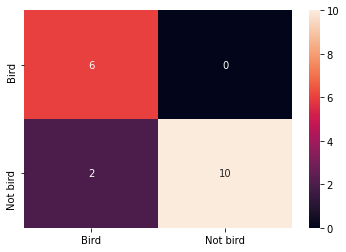

In [16]:
M = confusion_matrix(y_true, y_pred, labels=[1,0])
sns.heatmap(M, annot=True, xticklabels=['Bird', 'Not bird'], yticklabels=['Bird', 'Not bird'])

#### Imbalanced classes problem

In [17]:
y_true = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1])

In [18]:
y_pred = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0])

In [19]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy = {acc :.3f}")

Accuracy = 0.846


<AxesSubplot:>

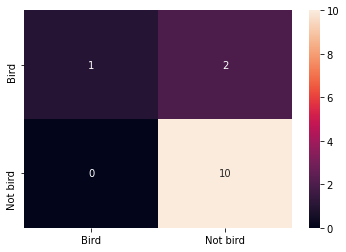

In [20]:
M = confusion_matrix(y_true, y_pred, labels=[1,0])
sns.heatmap(M, annot=True, xticklabels=['Bird', 'Not bird'], yticklabels=['Bird', 'Not bird'])

Accuracy 84 is not so bad, but obviously not informative. We recognized only one bird from 13 examples

#### Precision & recall

$$Precision = \frac{Tp}{Tp+Fp}$$

$$Recall = \frac{Tp}{Tp+Fn}$$

In [21]:
def example_1():
    """Birds - non-birds"""
    y_true = np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0])
    y_pred = np.array([0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0])
    return y_true, y_pred

In [22]:
def example_2():
    """Precision 1"""
    y_true = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1])
    y_pred = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0])
    return y_true, y_pred

In [23]:
def example_3():
    """Recall 1"""
    y_true = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0])
    y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])
    return y_true, y_pred

In [24]:
# Once again, first example
y_true, y_pred = example_1()
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [25]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

In [26]:
print(f"Accuracy = {acc :.3f}")
print(f"Precision = {prec :.3f}")
print(f"Recall = {prec :.3f}")

Accuracy = 0.889
Precision = 0.750
Recall = 0.750


In [27]:
# And second one
y_true = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1])
y_pred = np.array([0,0,0,0,0,0,0,0,0,0,1,0,0])

In [28]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, labels=[1,0])
rec = recall_score(y_true, y_pred, labels=[1,0], average='binary')

In [29]:
print(f"Accuracy = {acc :.3f}")
print(f"Precision = {prec :.3f}")
print(f"Recall = {rec :.3f}")

Accuracy = 0.846
Precision = 1.000
Recall = 0.333


From sklearn documentation:
"Only report results for the class specified by pos_label"  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

We have only three positive sample in second example, thus we have following:

$$Precision = \frac{Tp}{Tp+Fp} = \frac{1}{1+0}=1$$
$$Recall = \frac{Tp}{Tp+Fn} = \frac{1}{1+2}=0.333$$

Precision equals one => model never classify non bird as bird

In [30]:
# Another one example
y_true = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

In [31]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred, average='binary')

In [32]:
print(f"Accuracy = {acc :.3f}")
print(f"Precision = {prec :.3f}")
print(f"Recall = {rec :.3f}")

Accuracy = 0.769
Precision = 0.769
Recall = 1.000


Recall equals one => all birds were classified as birds (but other animals could be classified as birds too)

#### F-measure

$$F_{1} = 2\frac{Precision * Recall}{Precision + Recall}$$

In [33]:
y_true, y_pred = example_1()
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
y_predict:
[0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]


In [34]:
prec = precision_score(y_true, y_pred, labels=[1,0])
rec = recall_score(y_true, y_pred, labels=[1,0], average='binary')

In [35]:
print(f"Precision = {prec :.3f}")
print(f"Recall = {rec :.3f}")

Precision = 0.750
Recall = 1.000


In [36]:
f1 = 2*(prec*rec) / (prec+rec)
print(f"F1 = {f1 :.3f}")

F1 = 0.857


In [37]:
f1 = f1_score(y_true, y_pred)
print(f"F1 = {f1 :.3f}")

F1 = 0.857


In [38]:
y_true, y_pred = example_2()
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[0 0 0 0 0 0 0 0 0 0 1 1 1]
y_predict:
[0 0 0 0 0 0 0 0 0 0 1 0 0]


In [39]:
f1 = f1_score(y_true, y_pred)
print(f"F1 = {f1 :.3f}")

F1 = 0.500


In [40]:
y_true, y_pred = example_3()
print(f"y_true:\n{y_true}\ny_predict:\n{y_pred}")

y_true:
[1 1 1 1 1 1 1 1 1 1 0 0 0]
y_predict:
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:
f1 = f1_score(y_true, y_pred)
print(f"F1 = {f1 :.3f}")

F1 = 0.870
